

# Exploring Reading Habits Before the COVID-19 Pandemic

People are forced to adapt their lifestyles during times of crises.

Millions of individuals throughout the world have had to adapt to a new reality as a result of the Corona virus crisis,

including changes in social interactions, work, and leisure activities. 

One notable change is how we consume information, specifically how we read, which was affected by the COVID-19 shutdown.

**This project will focus on reading habits prior to the coronavirus pandemic's outbreak.**

We'll be analyzing a database with records about books, publishers, writers, customer ratings and reviews. 

We'll try to identify trends and patterns in reading habits, preferences, and customer feedbacks.

This findings will be used to create a value proposition for companies that are looking to develop new apps for book lovers.


**This project aims to uncover several key patterns in reading habits, including:**

- The amount of books published per year since 2001.
- Which publishing company have the most books published?
- Identifying the best-rated author based on customer feedback.
- Identifying the most active book reviewers.

**Method**

- SQL queries generated by Python

#### Table of Content

- [ER Diagram](#diagram)

- [Loading Libraries & Database conect](#load)

- [Data Samples](#samples)

- [The number of book released after 01-01-2020](#819)

- [User reviews & Average rating](#user)

- [Top Publisher](#toppublisher)

- [Top Author](#topauthor)

- [The average text reviews among users who rated more than 50 books.](#avgrev)

- [Optional reading - further analysis](#optional)

- [Books By Decade](#decade)

- [Analysis of words in titles](#theme)

- [Page number mean & thickest books](#average)

- [Shortest books](#shortest)

- [Earliest title](#earliest)

- [Last released](#fresh)

<a id="diagram"></a>

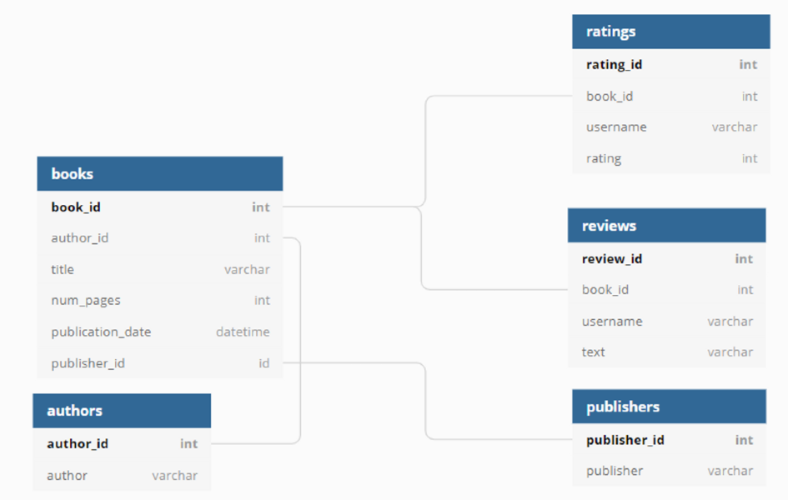

<a id="load"></a>

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import sqlite3
import psycopg2

In [2]:
db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'} 

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

In [4]:
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

**Samples of each table:**

<a id="samples"></a>

In [77]:
query = ''' SELECT *

            FROM 
                ratings
                
            LIMIT 3;
        '''

In [78]:
ratings=pd.io.sql.read_sql(query, con = engine)

ratings # Let's explore ratings

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5


##### Checking ratings Nulls:

In [79]:
query2 = """SELECT *

           FROM 
               ratings
           
           WHERE 
               rating_id IS NULL
                        OR book_id IS NULL
                        OR username IS NULL
                        OR rating IS NULL;
        """

In [80]:
ratings_null=pd.io.sql.read_sql(query2, con = engine)

ratings_null # Let's explore ratings Null's

,rating_id,book_id,username,rating


##### Checking ratings duplicates:

In [81]:
query3 = """SELECT 
                rating_id, 
                rating, 
                COUNT(*)

           FROM 
               ratings
           
           GROUP BY 
               rating_id, rating
           HAVING 
               COUNT(*) > 1;
        """

In [82]:
ratings_dup = pd.io.sql.read_sql(query3, con = engine)

ratings_dup

,rating_id,rating,count


#### Reviews DataFrame

In [83]:
query5 = ''' SELECT *

            FROM 
                reviews
                
            LIMIT 3;
        '''

In [84]:
reviews=pd.io.sql.read_sql(query5, con = engine)

reviews # Let's explore reviews

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...


##### Checking reviews Nulls:

In [85]:
query6 = ''' SELECT *

            FROM 
                reviews
                
            WHERE 
                review_id IS NULL
                        OR book_id IS NULL
                        OR username IS NULL
                        OR text IS NULL;
        '''

In [86]:
reviews_null = pd.io.sql.read_sql(query6, con = engine)

reviews_null # Let's explore reviews's Null

,review_id,book_id,username,text


##### Checking reviews duplicates:

In [87]:
query7 = """SELECT 
                review_id, 
                book_id, 
                COUNT(*)

           FROM 
               reviews
           
           GROUP BY 
               review_id, book_id
               
           HAVING 
               COUNT(*) > 1;
        """

In [88]:
reviews_dup = pd.io.sql.read_sql(query7, con = engine)

reviews_dup # Let's explore reviews's Duplicates

,review_id,book_id,count


In [89]:
query8 = """SELECT 
                username, 
                text, 
                COUNT(*)

           FROM 
               reviews
           
           GROUP BY 
                username, text
                
           HAVING 
               COUNT(*) > 1;
        """

In [90]:
reviews_dupli = pd.io.sql.read_sql(query8, con = engine)

reviews_dupli # Let's explore reviews's Duplicates

,username,text,count


#### Publishers DataFrame

In [91]:
query9 = ''' SELECT *

            FROM 
                publishers
                
            LIMIT 3;
        '''

In [93]:
publishers=pd.io.sql.read_sql(query9, con = engine)

publishers # Exploring publishers

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books


#### Checking publishers Nulls:

In [94]:
query10 = ''' SELECT *

            FROM 
                publishers
            
            WHERE 
                publisher_id IS NULL
                  OR publisher IS NULL;
        '''

In [96]:
publishers_nulls=pd.io.sql.read_sql(query10, con = engine)

publishers_nulls # Exploring publishers

,publisher_id,publisher


#### Checking publishers duplicates:

In [97]:
query11 = """
           SELECT 
                publisher_id, 
                publisher, 
                COUNT(*)

           FROM 
               publishers
           
           GROUP BY 
               publisher_id, 
               publisher
               
           HAVING 
               COUNT(*) > 1;
        """

In [98]:
publishers_dup = pd.io.sql.read_sql(query11, con = engine)

publishers_dup # Let's explore reviews's Duplicates

,publisher_id,publisher,count


#### Authors DataFrame

In [99]:
query12 = ''' SELECT *

            FROM 
                authors
                
            LIMIT 3;
        '''

In [101]:
authors=pd.io.sql.read_sql(query12, con = engine)

authors # Exploring authors

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie


##### Authors Null's:

In [102]:
query13 = ''' 
            SELECT *

            FROM 
                authors
            
            WHERE 
                author_id IS NULL
               OR author IS NULL;
        '''

In [103]:
authors_nulls = pd.io.sql.read_sql(query13, con = engine)

authors_nulls # Let's explore authors Null's

,author_id,author


#### Authors duplicates:

In [104]:
query14 = """
           SELECT 
               author_id, 
               author, 
               COUNT(*)

           FROM 
               authors
           
           GROUP BY 
               author_id, author
               
           HAVING 
               COUNT(*) > 1;
        """

In [105]:
authors_dups = pd.io.sql.read_sql(query14, con = engine)

authors_dups # Let's explore authors Null's

,author_id,author,count


<a id="819"></a>

#### Let's find the number of books released after January 1, 2000:

In [106]:
query15 = ''' 
            SELECT
                COUNT(book_id)
                
            FROM 
                books
                
            WHERE 
                publication_date > '2000-01-01'
          '''

In [107]:
books_since=pd.io.sql.read_sql(query15, con = engine)
books_since

,count
0,819


<div class="alert alert-block alert-info">
<b>Insight</b>
    
- As we see, 819 books were released after January 1st 2000.

<a id="user"></a>

#### 2. Let's find the number of user reviews and the average rating for each book:

In [108]:
query18 = '''
             WITH 
             books_rate AS(SELECT 
                                 title,
                                 book_id, 
                                 AVG(rating) AS avg_rate
                                 
                           FROM books
                           
                           JOIN ratings 
                           USING (book_id)
                           
                           GROUP BY (book_id)),
                           
            books_reviews AS(SELECT 
                                  title, 
                                  book_id, 
                                  COUNT(review_id) AS count
                                  
                             FROM books
                             
                             JOIN reviews 
                             USING (book_id)
                             
                            GROUP BY (book_id)) 
                                    
              SELECT 
                  title, 
                  avg_rate, 
                  count
                  
              FROM 
                  books_rate
                  
              JOIN books_reviews
              USING (title) 
              
              ORDER BY (count) DESC;
              '''

In [109]:
book=pd.io.sql.read_sql(query18, con = engine)
book 

,title,avg_rate,count
0,Twilight (Twilight #1),3.662500,7
1,The Road,3.772727,6
2,The Book Thief,4.264151,6
3,Water for Elephants,3.977273,6
4,The Glass Castle,4.206897,6
...,...,...,...
991,Naked Empire (Sword of Truth #8),3.500000,1
992,Moo Baa La La La!,3.000000,1
993,Merrick (The Vampire Chronicles #7),4.000000,1
994,Babyville,3.500000,1


In [110]:
query = '''
        SELECT 
            title,
            book_id, 
            AVG(rating) AS avg_rating
            
        FROM 
            books
            
        JOIN ratings 
        USING (book_id)
        
        GROUP BY 
            (book_id)
            
        ORDER BY (avg_rating) DESC;
        '''

In [111]:
books=pd.io.sql.read_sql(query, con = engine)
books 

,title,book_id,avg_rating
0,Pop Goes the Weasel (Alex Cross #5),518,5.00
1,The Ghost Map: The Story of London's Most Terr...,732,5.00
2,In the Hand of the Goddess (Song of the Liones...,347,5.00
3,Tai-Pan (Asian Saga #2),610,5.00
4,How to Be a Domestic Goddess: Baking and the A...,330,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,915,2.25
996,Junky,371,2.00
997,His Excellency: George Washington,316,2.00
998,Drowning Ruth,202,2.00


<div class="alert alert-block alert-info">
<b>Insight</b>
    
- It is apparent that **Twilight** has the highest number of reviews among all the books.
    
    
- **"Pop Goes the Weasel (Alex Cross #5)"** share it's rating with other titles with the highest rating of 5.

#### 3. Let's Identify the publisher that has released the greatest number of books with more than 50 pages.

In [112]:
query19 = """ 
            SELECT 
                COUNT(b.book_id) AS books_num,
                p.publisher as publisher
                    
            FROM 
                books as b
                
            RIGHT JOIN publishers AS p 
            ON b.publisher_id=p.publisher_id
            
            WHERE 
                (b.num_pages > 50)
                
            GROUP BY 
                p.publisher
                
            ORDER BY books_num DESC
            LIMIT 1;
        """
# Using right join in order to maintain ALL publishers

In [113]:
rev_rate_each=pd.io.sql.read_sql(query19, con = engine)
rev_rate_each

,books_num,publisher
0,42,Penguin Books


<a id="toppublisher"></a>

<div class="alert alert-block alert-info">
<b>Insight</b>

- **Penguin Books** is our top publisher with 42 books that are more than 50 pages.

#### 4. Let's identify the author with the highest average book rating (only books with at least 50 ratings):

<a id="topauthor"></a>

In [114]:
query21='''
    SELECT
        books."author_id",
        authors."author",
        AVG(ratings."rating") AS avg_rating
        
    FROM
        authors 
    
    RIGHT JOIN books 
    ON authors."author_id" = books."author_id"
    
    RIGHT JOIN ratings 
    ON books."book_id" = ratings."book_id"
    
    GROUP BY
        books."author_id", authors."author"
        
    HAVING
        COUNT(ratings."rating_id") > 50
        
    ORDER BY
        avg_rating DESC
    LIMIT (1)
        '''

In [115]:
topauthor_fix=pd.io.sql.read_sql(query21, con = engine)
topauthor_fix

,author_id,author,avg_rating
0,236,J.K. Rowling/Mary GrandPré,4.288462


<div class="alert alert-block alert-info">
<b>Insight</b>
    
Looks like J.K.Rowling/Mary Grandpre is out top authors

<a id="avgrev"></a>

#### 5. Let's Find the average number of text reviews among users who rated more than 50 books.

In [118]:
query22 = """
    SELECT 
        AVG(text_cnt) AS text_avg
        
    FROM
      (SELECT u_rate.username,
              rate_cnt,
              count(text) AS text_cnt
       FROM (
               (SELECT *
                FROM
                  (SELECT r.username,
                          COUNT(r.username) AS rate_cnt
                   FROM ratings r
                   GROUP BY r.username) AS t_rate
                   WHERE rate_cnt>50 ) AS u_rate
    LEFT JOIN
           (SELECT re.username,
                   re.text
            FROM reviews re) AS u_reviews 
            
    ON u_rate.username = u_reviews.username)
    
    GROUP BY 
        u_rate.username,
        rate_cnt) AS g

        """ 

In [119]:
avg_text_rev=pd.io.sql.read_sql(query22, con = engine)
avg_text_rev

,text_avg
0,24.333333


# Conclusions

 - **819 books** had been released since 01-01-2000
 
 
 - **Twilight** is the most reviewd title, with 1120 total. 
 
   It obtained a rating of 3.66 in the table that summarized ratings and reviews of each book.
   
- **"Pop Goes the Weasel (Alex Cross #5)"** share it's rating with other titles with the highest rating of 5.
   
   
 - **Penguin Books** is our top publisher of books that are greater the 50 pages.
 
 
 - **J.K.Rowling/Mary Grandpre** is the top author by rating amoung books that were rated for at least 50 times.
 
 
 - The **average number of text reviews among users who rated more than 50 books is 24.33**

<a id="optional"></a>

**let's explore the distribution of books by decades**

<a id="decade"></a>

In [120]:
query = ''' SELECT 
                    COUNT(publication_date) AS count,
                       CASE
                           WHEN publication_date BETWEEN '1952-12-01' AND '1960-12-31' THEN '50s released books'
                           WHEN publication_date BETWEEN '1961-01-01' AND '1969-12-31' THEN '60s released books'
                           WHEN publication_date BETWEEN '1970-01-01' AND '1979-12-31' THEN '70s released books'
                           WHEN publication_date BETWEEN '1980-01-01' AND '1989-12-31' THEN '80s released books'
                           WHEN publication_date BETWEEN '1990-01-01' AND '1999-12-31' THEN '90s released books'
                           WHEN publication_date BETWEEN '2000-01-01' AND '2009-12-31' THEN '2000s released books'
                           WHEN publication_date BETWEEN '2010-01-01' AND '2020-12-31' THEN '2010s released books'
                           WHEN publication_date BETWEEN '2021-01-01' AND '2020-03-31' THEN '2020s released books'
                       END AS decade
                   
            FROM 
                books
                
            GROUP BY 
                decade
                
            ORDER BY 
                count DESC
        '''

In [121]:
reviews=pd.io.sql.read_sql(query, con = engine) 
reviews                                         # books released by decade

,count,decade
0,804,2000s released books
1,149,90s released books
2,28,80s released books
3,17,2010s released books
4,1,70s released books
5,1,50s released books


- The first decade of the 2000s is characterized by the largest number of published books: 804 books
- In contrast, we hold very few books published in the 1950s and 1970s.
- Interestingly, we do not have a single book published in the 1960s.

**Let's look at the headings and check the distribution of common words**

<a id="theme"></a>

There is a famous saying: **"You don't judge a book by its cover"**. 

If so, we should not judge a book by its title. 

But in the absence of accessibility and availability for the examination of each book, and for the purposes of
our analysis, we will examine books titles based on the assumption that perhaps, at least in most cases, they'll hint 
at the narrative theme/genre.

In [122]:
query = ''' SELECT 
                COUNT(DISTINCT(title)),
                CASE
                    WHEN title ILIKE '%%Crime%%' THEN 'Crime'
                    WHEN title ILIKE '%%Humour%%' THEN 'Humour'
                    WHEN title ILIKE '%%LOVE%%' THEN 'Love'
                    WHEN title ILIKE '%%Mystery%%' THEN 'Mystery'
                    WHEN title ILIKE '%%War%%' THEN 'War'
                    WHEN title ILIKE '%%HISTORY%%' THEN 'History'
                    WHEN title ILIKE '%%Science%%' THEN 'Science'
                    WHEN title ILIKE '%%Women%%' THEN 'Women'
                    WHEN title ILIKE '%%Autobiography%%' THEN 'Autobiography'
                    WHEN title ILIKE '%%SHORT%%' THEN 'Short'
                    WHEN title ILIKE '%%Young%%' THEN 'Young'
                END AS Genere
                
            FROM 
                books
                
            WHERE 
                title ILIKE '%%Crime%%' 
                OR title ILIKE '%%Humour%%' 
                OR  title ILIKE '%%LOVE%%' 
                OR title ILIKE '%%MYSTERY%%' 
                OR title ILIKE '%%War%%' 
                OR title ILIKE '%%HISTORY%%' 
                OR title LIKE '%%Science%%' 
                OR title ILIKE '%%WOMEN%%'
                OR title ILIKE '%%Autobiography%%' 
                OR title ILIKE '%%SHORT%%' 
                OR title ILIKE '%%YOUNG'
                
            GROUP BY 
                genere
                
            ORDER BY count DESC;
        '''

In [123]:
titles=pd.io.sql.read_sql(query, con = engine) 
titles              

,count,genere
0,21,Love
1,19,War
2,10,History
3,9,Women
4,4,Science
5,3,Short
6,2,Mystery
7,1,Autobiography
8,1,Crime


- The titles analysis yielded pretty poor results.

  Among 1000 titles, 21 of them include the word love in the title. Are all those 21 titles about love?
  
  Not necessarily. for example, we might had monitored 'Love' in the title 'My Love for Cooking',
  which will deal with recipes. 

  At the same time, it is interesting to see the relatively large distribution of words such as love, war, history, women and     science among the titles.

**Let's look at the thickest books** 

<a id="average"></a>

In [124]:
query = """ SELECT 
                AVG(num_pages)
                
            FROM 
                books
        """

In [125]:
average=pd.io.sql.read_sql(query, con = engine) # the average number of pages is 389.11
average

,avg
0,389.111


In [126]:
query = """ SELECT 
                title,
                num_pages
                
            FROM 
                books
                
            WHERE 
                num_pages > (SELECT 
                                AVG(num_pages)
                             
                             FROM 
                                 books)
            ORDER BY 
                num_pages DESC
                
            LIMIT 3;
        """ 

In [127]:
top_thick=pd.io.sql.read_sql(query, con = engine)
top_thick 

,title,num_pages
0,Harry Potter Boxed Set Books 1-5 (Harry Potte...,2690
1,The Complete Anne of Green Gables Boxed Set (A...,2088
2,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,1728


- The thickest book by the number of pages is the Harry Potter book series, which contains 2,690 pages and is bound under one cover.

**The shortest titles**

<a id="shortest"></a>

In [128]:
query = """ SELECT 
                title, 
                num_pages
                
            FROM 
                books
                
            WHERE 
                num_pages = (SELECT 
                                MIN(num_pages)
                                
                             FROM 
                                 books)
            ORDER BY 
                num_pages DESC
                
            LIMIT 10;
        """

In [129]:
shortest=pd.io.sql.read_sql(query, con = engine) 
shortest

,title,num_pages
0,Moo Baa La La La!,14
1,Without Fail (Jack Reacher #6),14


- "Moo Baa La La la & "Without Fail" are the shortest books with 14 pages.

**Let's explore titles by released period**

<a id="earliest"></a>

In [130]:
query = """ SELECT 
                title, 
                publication_date
                
            FROM 
                books
                
            WHERE 
                publication_date = (SELECT 
                                        MIN(publication_date)
                                    
                                    FROM 
                                        books)
            LIMIT 3;
        """

In [131]:
the_oldest=pd.io.sql.read_sql(query, con = engine) # The oldest book in the set published on 01-12-1952
the_oldest

,title,publication_date
0,A Streetcar Named Desire,1952-12-01


- The earliest title released on 01-12-1952

<a id="fresh"></a>

In [132]:
query = """ SELECT 
                title, 
                publication_date
                
            FROM 
                books
                
            WHERE 
                publication_date = (SELECT 
                                        MAX(publication_date)
                                    
                                    FROM books)
            LIMIT 3;
        """

In [133]:
the_newest=pd.io.sql.read_sql(query, con = engine)
the_newest

,title,publication_date
0,A Quick Bite (Argeneau #1),2020-03-31


- The newest book in the set published on 31-03-2020